In [1]:
import numpy as np
import itertools
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def diff(x, lag):
    return x[lag:] - x[:-lag]

def get_longest_true(arr):
    total = 0
    s_max = -1
    id = -1
    for b, g in itertools.groupby(arr):
        s = len(list(g))
        total += s
        if b and s > s_max:
            s_max = s
            id = total
    
    return id - s_max, id - 1

def arr_deriv(x, y, lag = 1):
    return diff(y, lag) / diff(x, lag)

def estimate_umi_counts(umi_counts, lag=0.05):
    umi_counts = sorted(umi_counts)[::-1]
    log_umi_counts = np.log(umi_counts)
    log_rank = np.log(range(1, len(umi_counts) + 1))
    lag = round(len(umi_counts) * lag)

    x = log_rank[lag:len(log_rank)]; 
    y = arr_deriv(log_rank, log_umi_counts, lag)
    x2 = x[lag:len(x)]
    y2 = arr_deriv(x, y, lag)
    max_num = int(round(np.exp(x2[get_longest_true(y2 > 0)[0]])))
    expected_num = int(round(np.exp(x[np.argmin(y[1:(max_num-lag)])])-lag / 4))
    return dict(expected=expected_num, max=max_num, min=round(expected_num * 0.75))

In [3]:
x = np.load('./numpy_arrays/simu_12_good.npy')

In [4]:
tc = np.sum(x, axis=1)
ord = np.argsort(tc)

In [32]:
umis_cnt_per_cb = np.array(sorted(tc)[::-1])

{'max': 11598, 'expected': 6330, 'min': 4748}


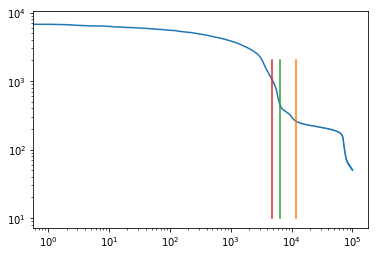

In [33]:
out = estimate_umi_counts(umis_cnt_per_cb[1:30000])
plt.plot(umis_cnt_per_cb)
for k,v in out.items(): plt.plot([v,v],[10,2000])
plt.xscale('log')
plt.yscale('log')
print(out)

In [37]:
for k,v in out.items():
    print(k,v,sorted(tc)[-v])

max 11598 262
expected 6330 478
min 4748 1064
